# TUTORIAL 3: visualização de dados em R

*Fortaleza, dezembro de 2019*

*por Samuel Carleial*

### Descrição
Neste tutorial veremos como é possivel representar dados quantitatvos de maneira gráfica usando diferentes recursos e pacotes no R. Primeiro, veremos os princípios usados em programação em R e como configurar e personalizar gráficos. Depois, veremos exemplos dos tipos mais comuns de gráficos, assim como visualizações mais rebuscadas.

Especificamente veremos exemplos de como visualizar:
+ 1 variável
+ 2 variáveis
+ 3 variáveis
+ Múltiplas variáveis

## (1) Iniciar o ambiente do R

In [1]:
# carregar pacotes
library("lattice")
library("ggplot2", quietly = TRUE)
library("GGally")
library("RColorBrewer")
library("corrplot", quietly = TRUE)

# carregar funções definidas pelo usuário
source("/Users/samuelcarleial/GitProjects/data-analysis-reference/helpfulFunctions.R")

# definir o tamanho em polegadas dos gráficos a serem mostrados na tela (4x4)
options(repr.plot.width=4, repr.plot.height=4)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”corrplot 0.84 loaded


## (2) Carregar conjunto de dados

In [2]:
carros <- mtcars

In [3]:
head(carros)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

## (3) Como visualizar 1 variável

In [4]:
# definir variável x (cavalo-vapor; cavalos)
x <- carros$hp
x

[1] 110 110  93 110 175 105 245  62  95 123 123 180 180 180 205 215 230  66  52
[20]  65  97 150 150 245 175  66  91 113 264 175 335 109

#### Scatterplot

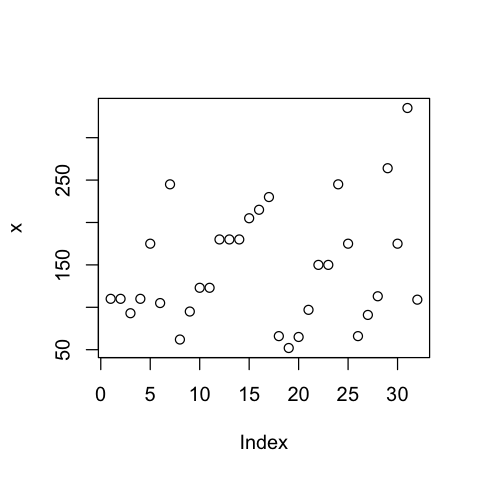

In [5]:
plot(x)

#### Histograma (usando frequência)

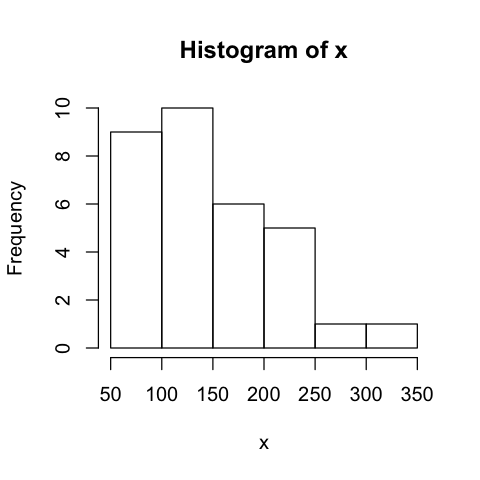

In [6]:
hist(x)

#### Histograma (usando proporção)

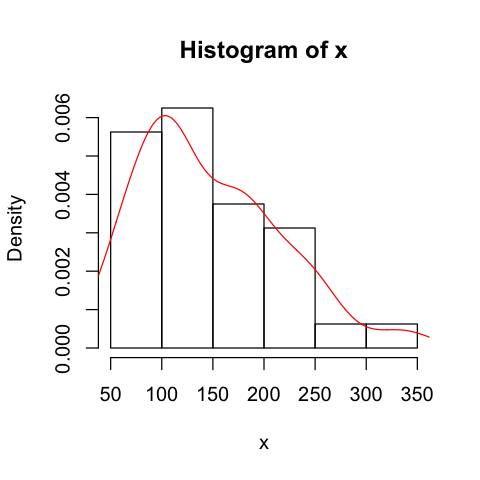

In [7]:
hist(x, freq = FALSE)
lines(density(x), col="red")

#### Boxplot

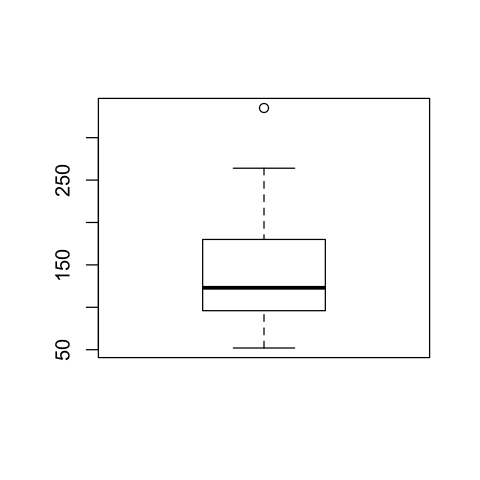

In [8]:
boxplot(carros$hp)

**Observação** 

Nas funções de plotagem, também é possível usar diretamente variáveis desde um conjunto de dados. Assim, se *x  <- carros$hp*, então: 

*plot(x) = plot(carros$hp) = plot(carros[,"hp"]) = plot(carros[["hp"]])*

Até mesmo condicionais podem ser usados para acesar variáveis em conjuntos de dados. A exemplo, *x* equivale a *carros[, which(names(carros)=="hp")]*

Ou mesmo indexar, por exemplo *x* equivale a *carros[,4]*

#### Diferentes gráficos numa só função

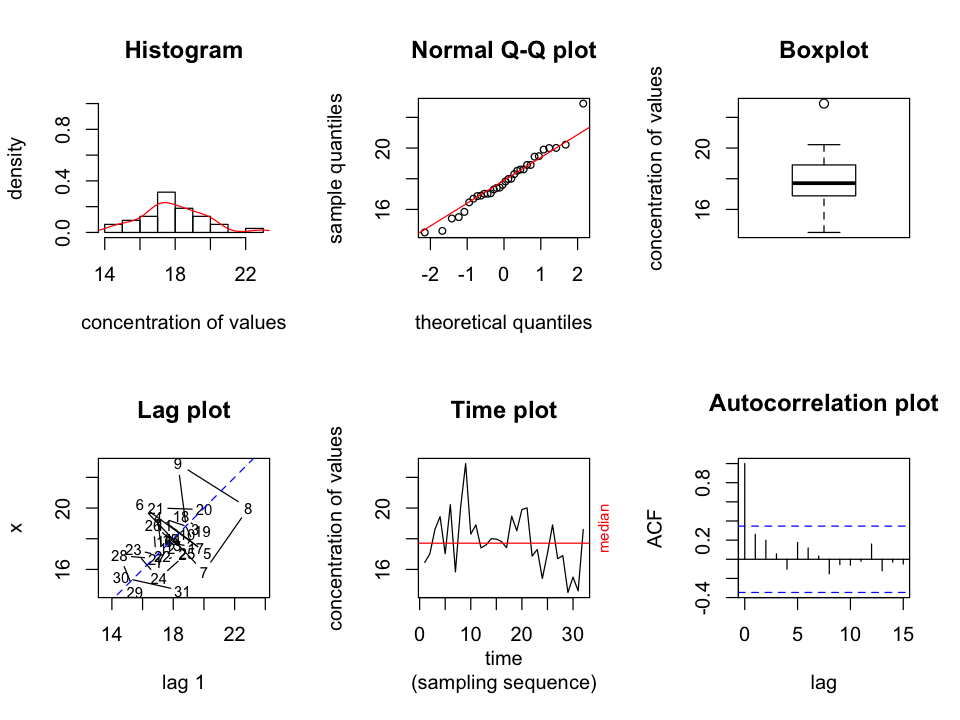

In [9]:
options(repr.plot.width=8, repr.plot.height=6)
sixPlot(carros$qsec)

**Conclusão**

Uma única variável pode ser representada num plano 2D de diferentes formas. Dependendo do tipo de gráfico, diferentes aspectos pertinentes a variável em questão podem ser enfatizados. Por exemplo, os gráficos acima podem focar medidas de localização, dispersão ou autocorrelação.

## (4) Como visualizar 2 variáveis

In [10]:
y <- carros$qsec
y

[1] 16.46 17.02 18.61 19.44 17.02 20.22 15.84 20.00 22.90 18.30 18.90 17.40
[13] 17.60 18.00 17.98 17.82 17.42 19.47 18.52 19.90 20.01 16.87 17.30 15.41
[25] 17.05 18.90 16.70 16.90 14.50 15.50 14.60 18.60

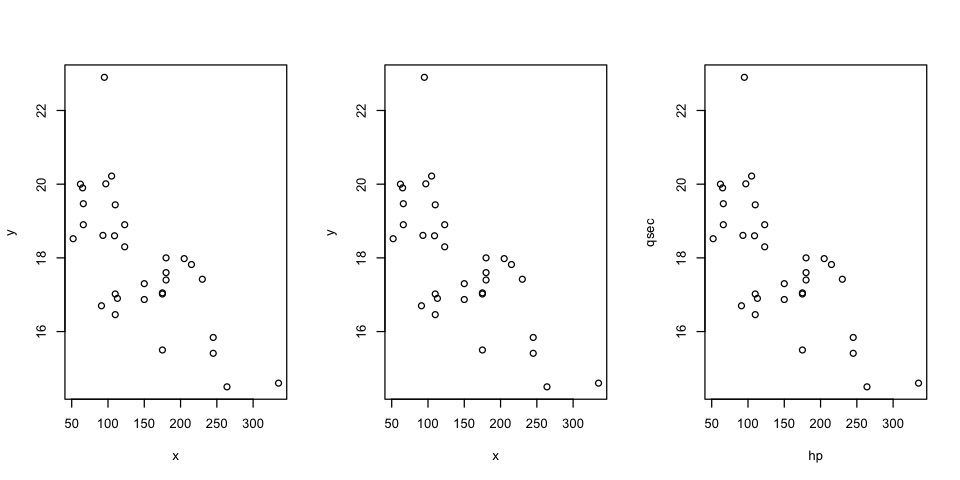

In [11]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1,3))

# três maneiras de reproduzir o mesmo gráfico
plot(x, y)
plot(y ~ x)
plot(qsec ~ hp, data = carros)

## (5) Como visualizar 3 variáveis

In [12]:
# modificar as caracteristicas do painel
options(repr.plot.width=4, repr.plot.height=2.5)
# adicionar variável z
z <- carros$cyl
table(z)

z
 4  6  8 
11  7 14 

#### Forma rápida e fácil usando lattice

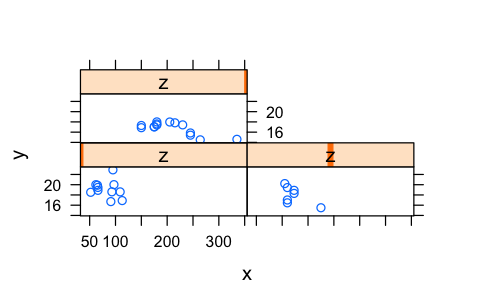

In [13]:
xyplot(y ~ x | z)

#### Forma mais rebuscada usando ggplot2
Usando o princípio da gramática de gráficos

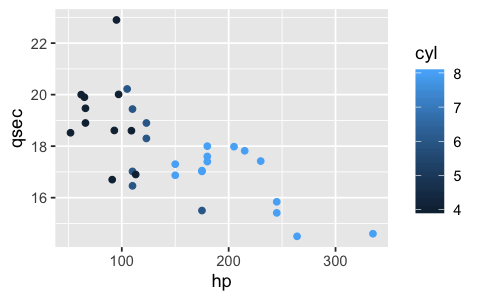

In [14]:
# exemplo 1.1
# primeiro cria-se o fundamento do gráfico
g <- ggplot(aes(y=qsec, x=hp, color=cyl), data = carros)
# logo, ao fundamento, adiciona-se a camada geométrica de pontos (com cores)
g + geom_point()

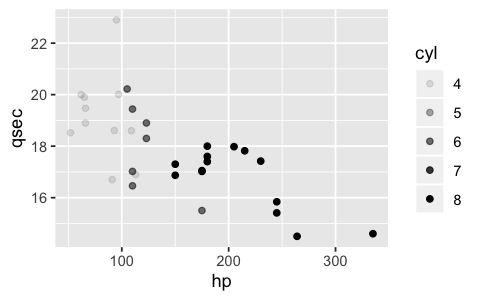

In [15]:
# exemplo 1.2
g <- ggplot(aes(y=qsec, x=hp, alpha=cyl), data = carros)
# logo, ao fundamento, adiciona-se a camada geométrica de pontos (com transparencias)
g + 
 geom_point()

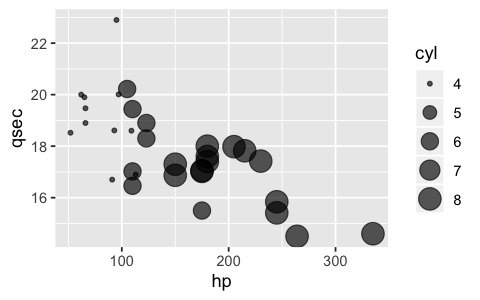

In [16]:
# exemplo 1.3
g <- ggplot(aes(y=qsec, x=hp, size=cyl), data = carros)
g + 
 geom_point(alpha=.65)

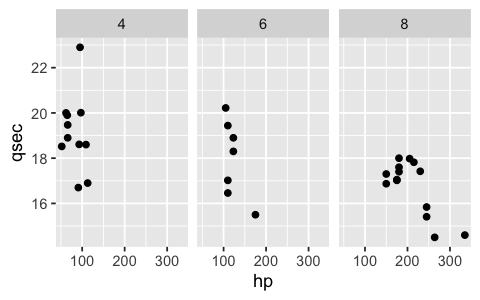

In [17]:
# exemplo 1.4
g <- ggplot(aes(y=qsec, x=hp, group=cyl), data = carros)
g + 
 geom_point() + 
 facet_grid(.~cyl)

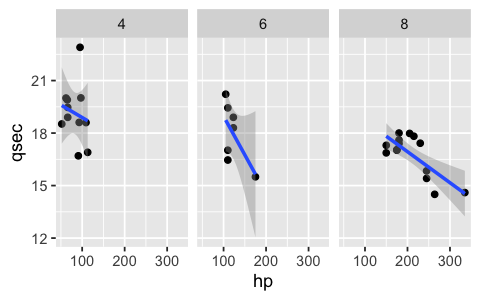

In [18]:
# exemplo 1.5
g <- ggplot(aes(y=qsec, x=hp, group=cyl), data = carros)
g + 
 geom_point() + 
 geom_smooth(method = "lm") + 
 facet_grid(.~cyl)

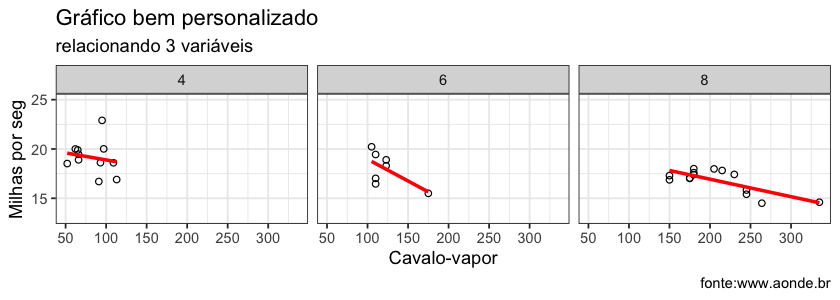

In [19]:
# exemplo 1.5 (bem mais personalizado!)
options(repr.plot.width=7, repr.plot.height=2.5)

g <- ggplot(aes(y=qsec, x=hp, group=cyl), data = carros)
g + 
 labs(title="Gráfico bem personalizado",
      subtitle="relacionando 3 variáveis",
      caption="fonte:www.aonde.br",
      x="Cavalo-vapor",
      y="Milhas por seg") +
 geom_point(pch=21) + 
 geom_smooth(method = "lm", se = FALSE, col="red") + 
 scale_y_continuous(limits = c(13,25), breaks = c(seq(15,25,5))) +
 scale_x_continuous(breaks = c(seq(0,300,50))) +
 facet_grid(.~cyl) +
 theme_bw()

Exemplo de o que pode ser editado em gráficos

+ Aspectos possíveis:
    + alpha
    + cor
    + grupo
    + tamanho
    ...

+ Outras funções possíveis:
    + geom_point()
    + geom_jitter()
    + geom_histogram()
    + geom_bar()
    + geom_text()
    + geom_violin()
    
+ Extra:
    + legendas e textos
    + Eixos, rótulos e limites
    + Plano de fundo

## (6) Como visualizar múltiplas variáveis

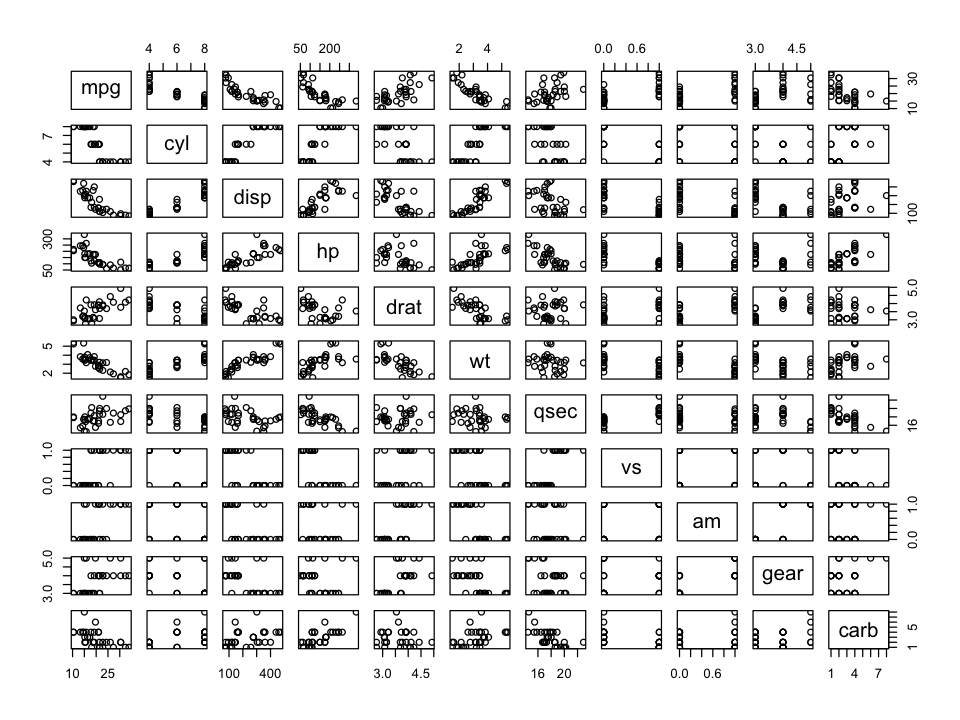

In [20]:
options(repr.plot.width=8, repr.plot.height=6)
pairs(carros)

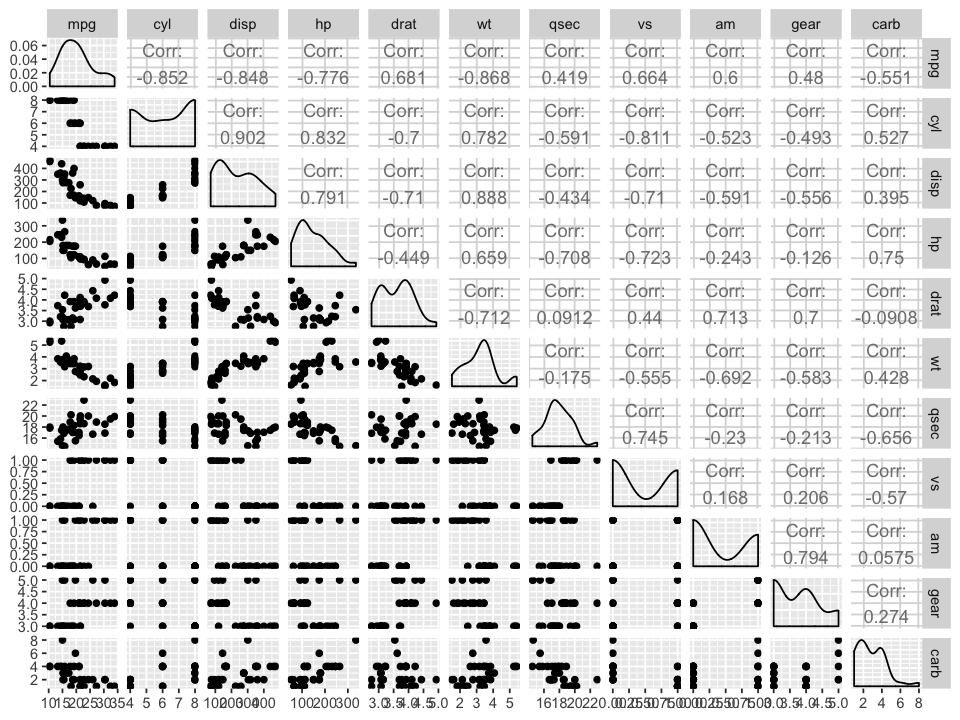

In [21]:
ggpairs(carros)

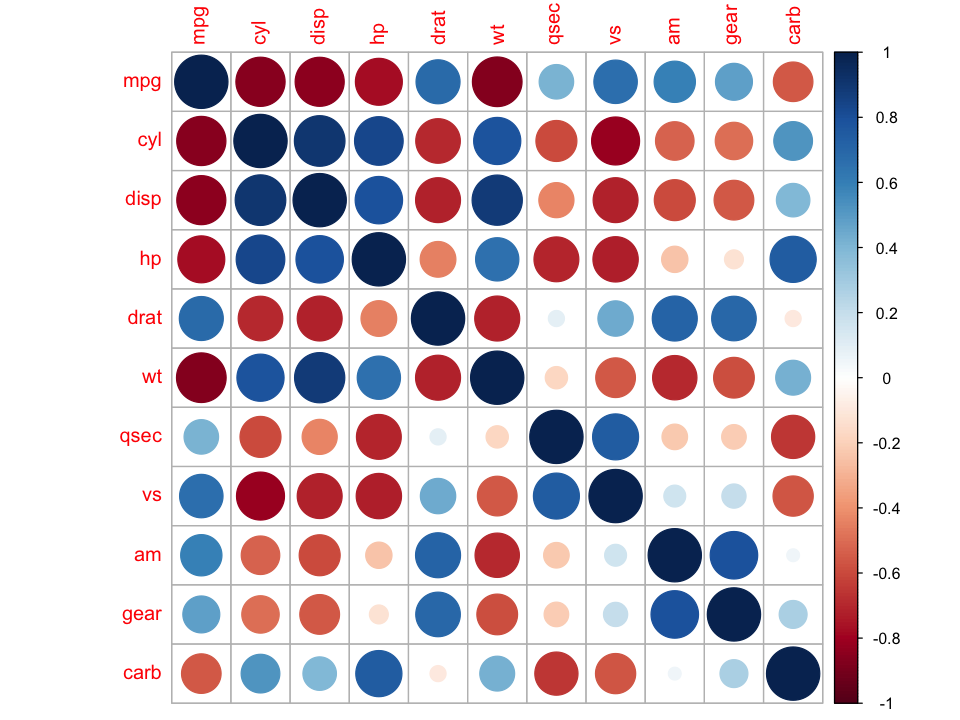

In [22]:
corrplot(cor(carros))

## (7) Personalizando gráficos em R
Leia a documentação pertinente as funções usadas para plotar (ex: ?plot() ou ??plot() ) e use parâmetros gráficos ou camadas sobre os gráficos para incrementar detalhes e melhorar a representação dos resultados.

### Tipos de pontos

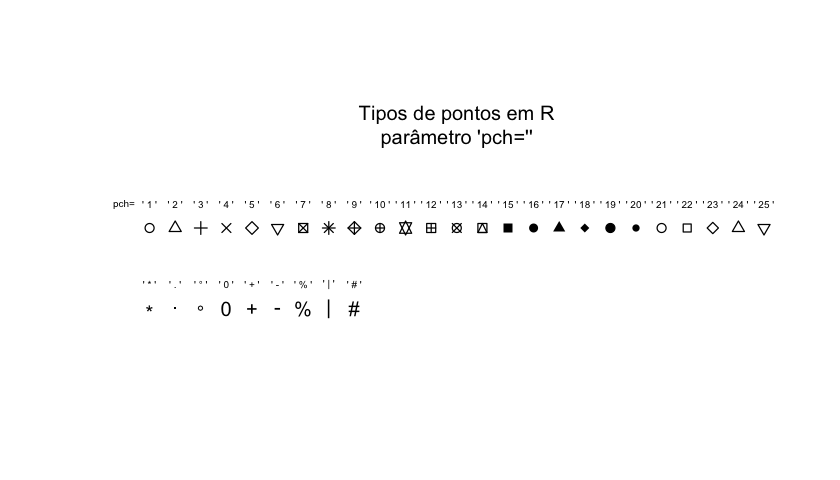

In [23]:
# desconsidere o código abaixo, e apenas veja o gráfico dele produzido
options(repr.plot.width=7, repr.plot.height=4)
plot(0, type='n', axes=FALSE, ann=FALSE, xlim=c(0, 25), ylim=c(0, 30))

text(13, 28, "Tipos de pontos em R\nparâmetro 'pch=''")
text(0, 18, "pch=", cex=.5)

for (i in 1:25) {
  text(i, 18, paste("'", i, "'"), cex=.5)
  points(i, 15, pch = i)
}

simbolos <- c("*", ".", "°", "0", "+", "-", "%", "|", "#")
for (i in simbolos) {
  text(which(simbolos == i), 8, paste("'", i, "'"), cex=.5)
  points(which(simbolos == i), 5, pch = i)
}

### Tipo de linhas

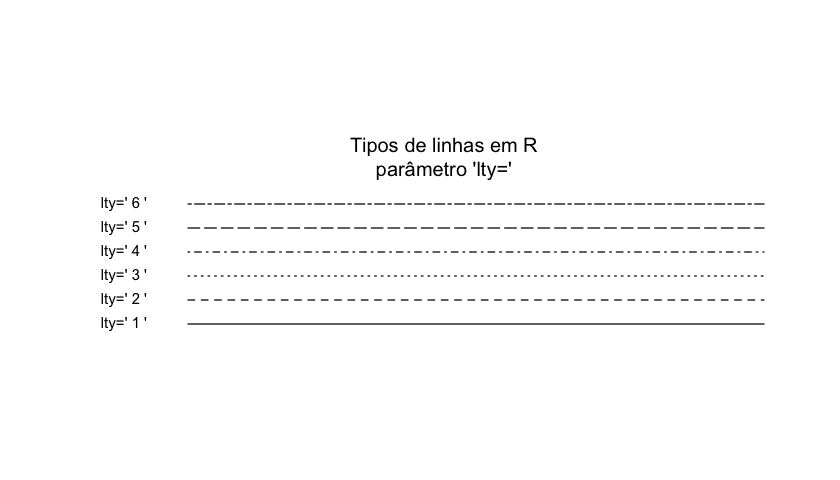

In [24]:
# desconsidere o código abaixo, e apenas veja o gráfico dele produzido
plot(0, type='n', axes=FALSE, ann=FALSE, xlim=c(0, 10), ylim=c(0, 10))

text(5, 8, "Tipos de linhas em R\nparâmetro 'lty='")
for (i in 1:6) {
  text(0, i, paste("lty='", i, "'"), cex=.75)
  lines(c(1,10), c(i,i), lty=i)
}


### Cores

Loading required package: grid


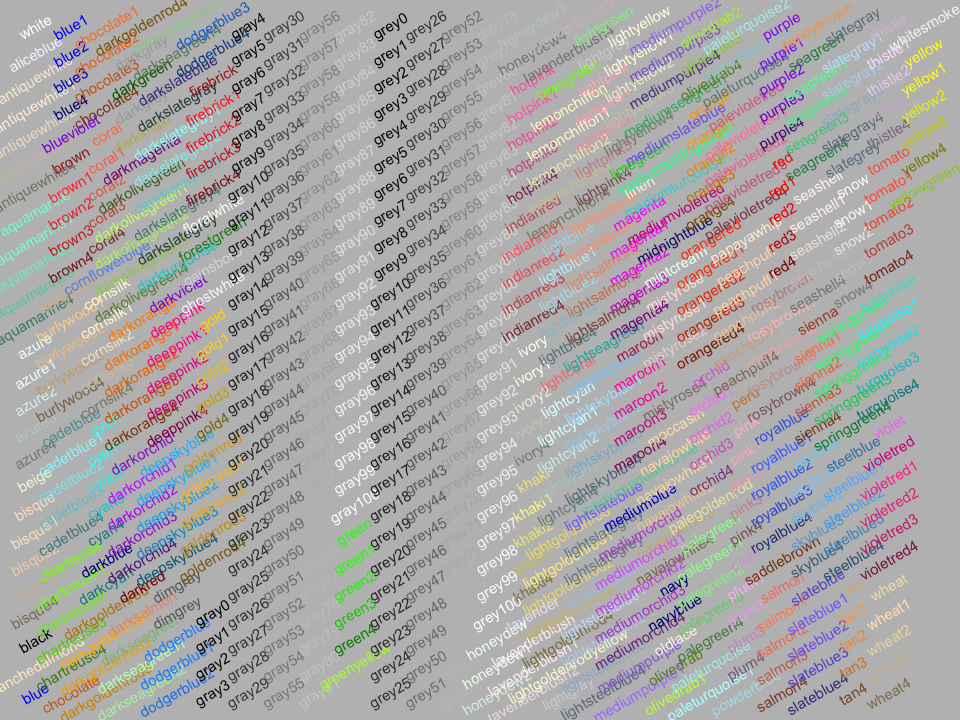

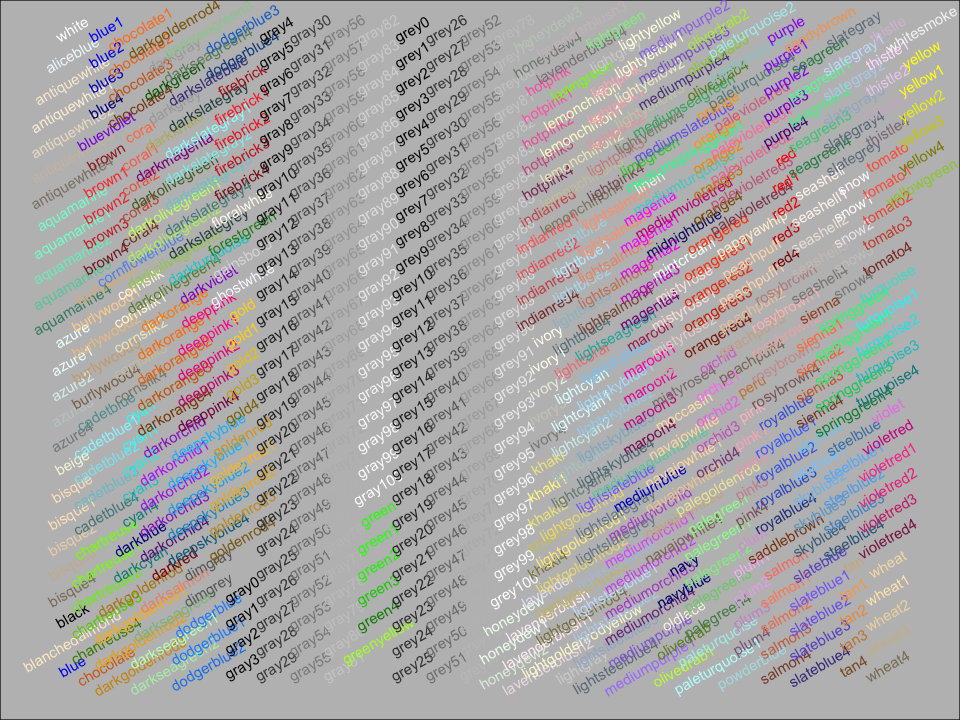

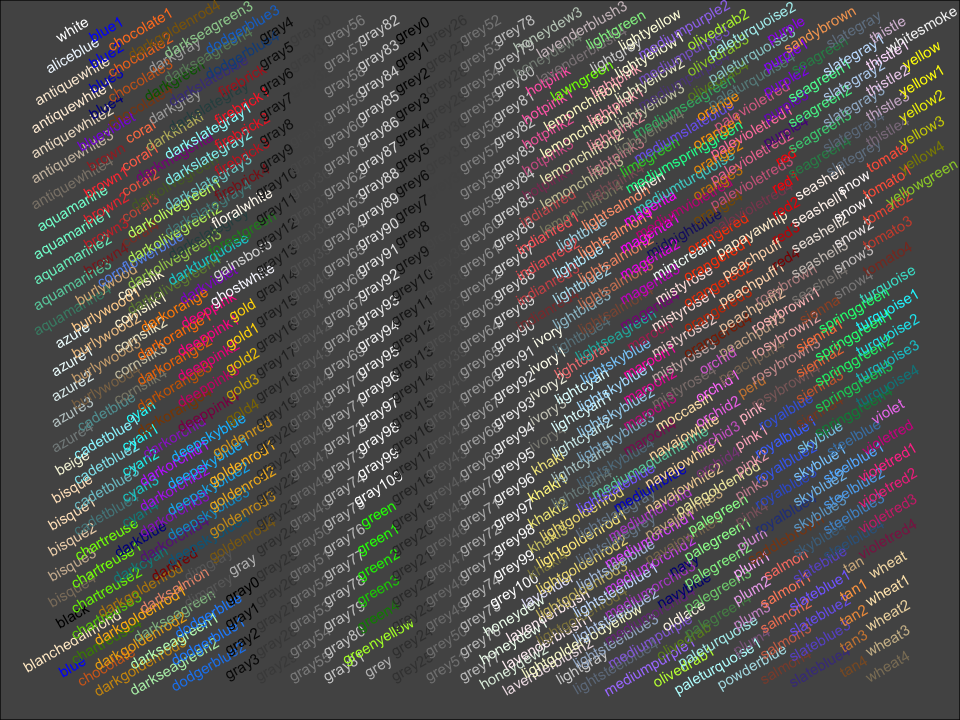

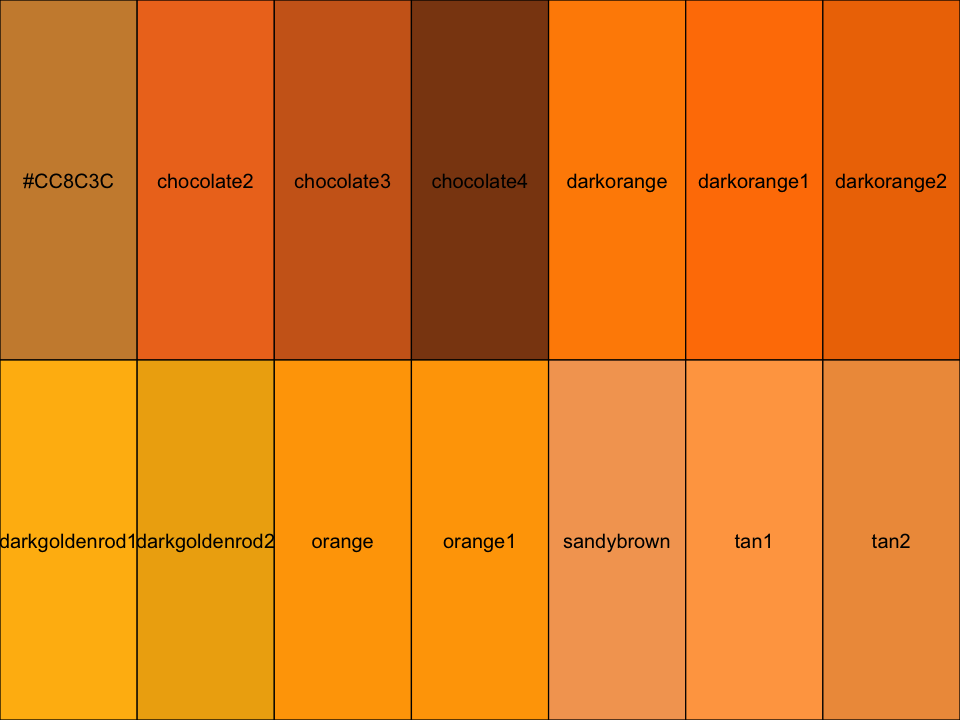

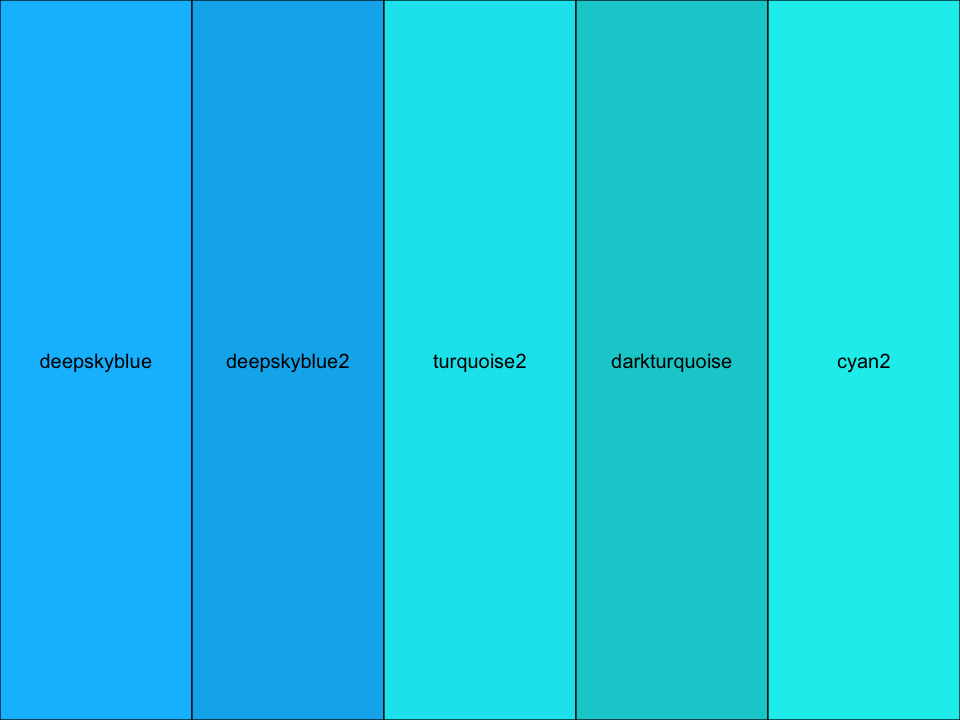

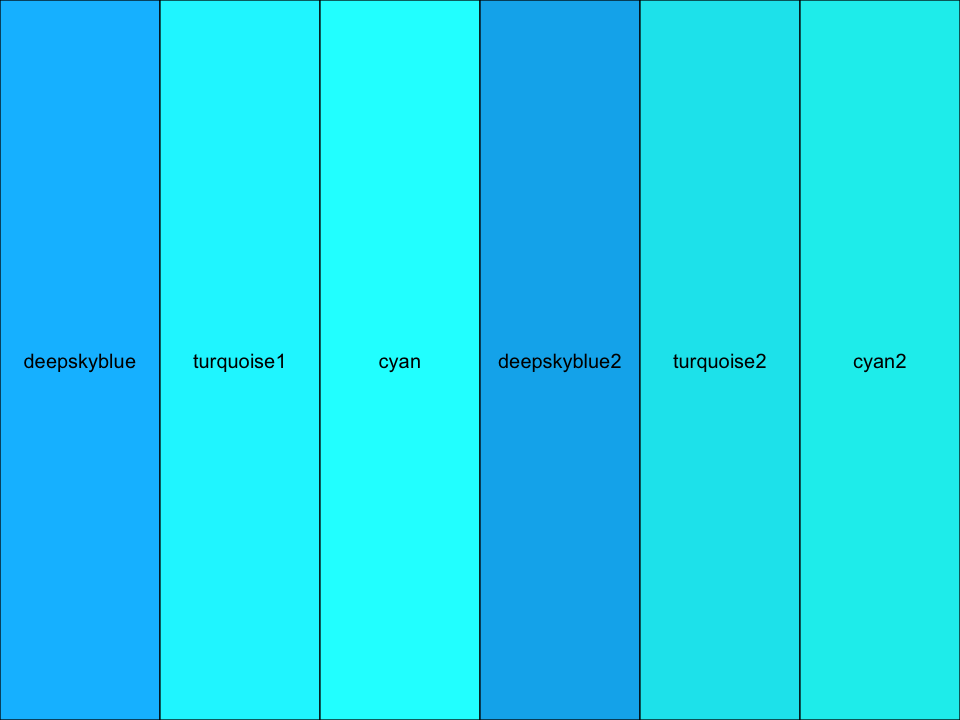

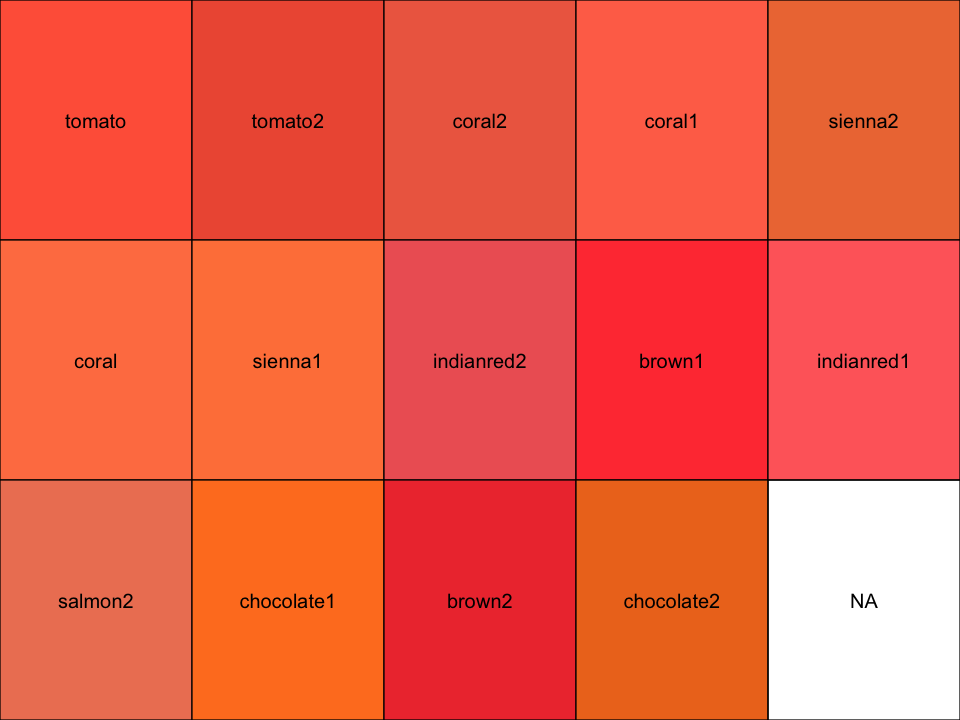

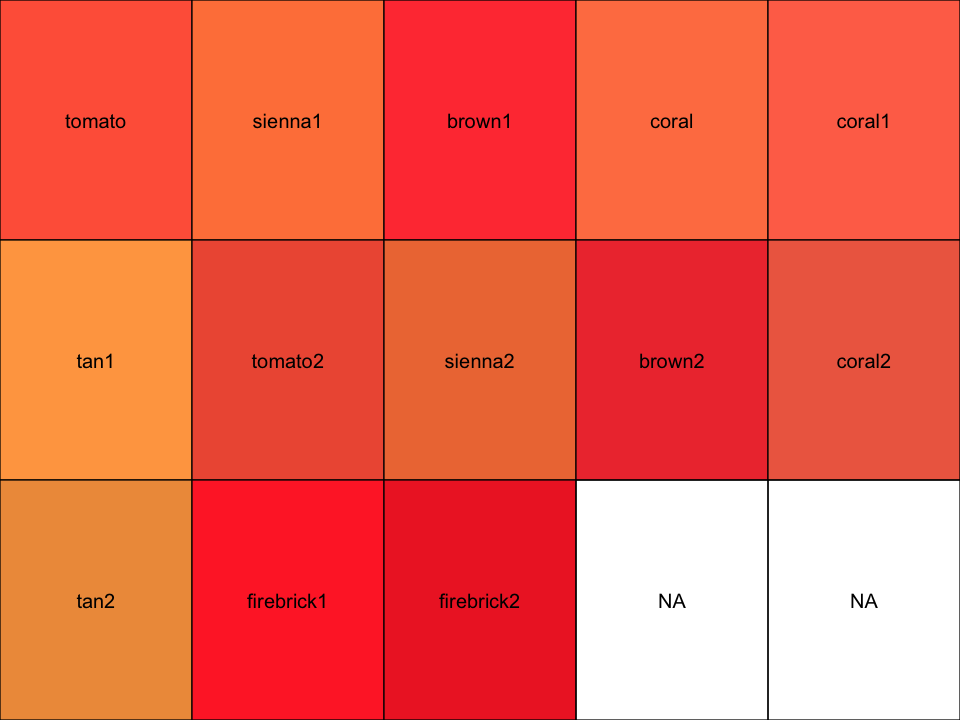

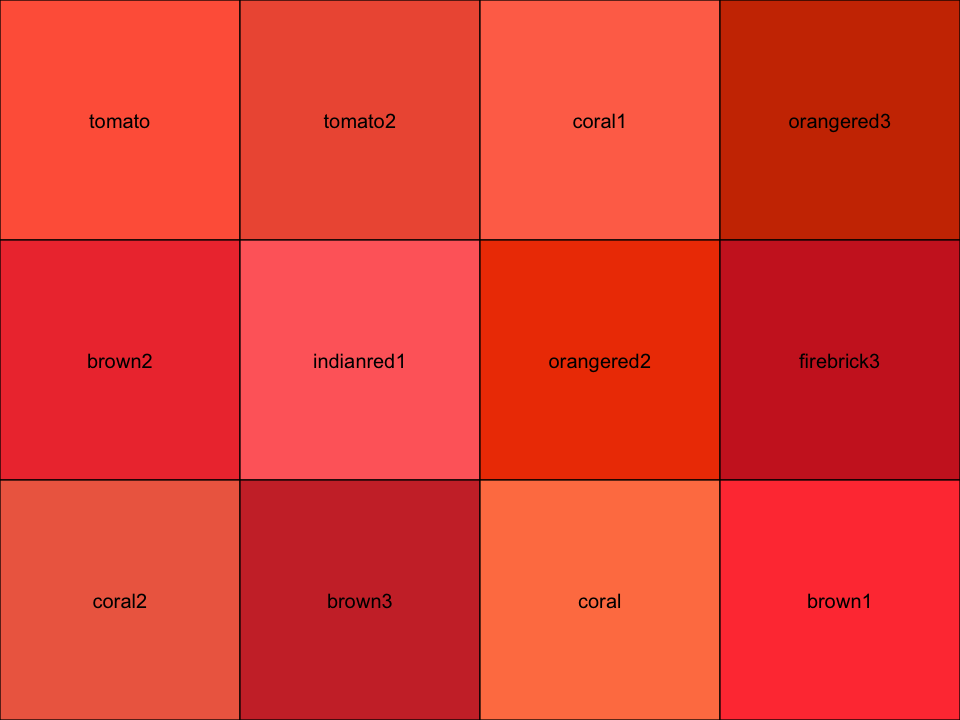

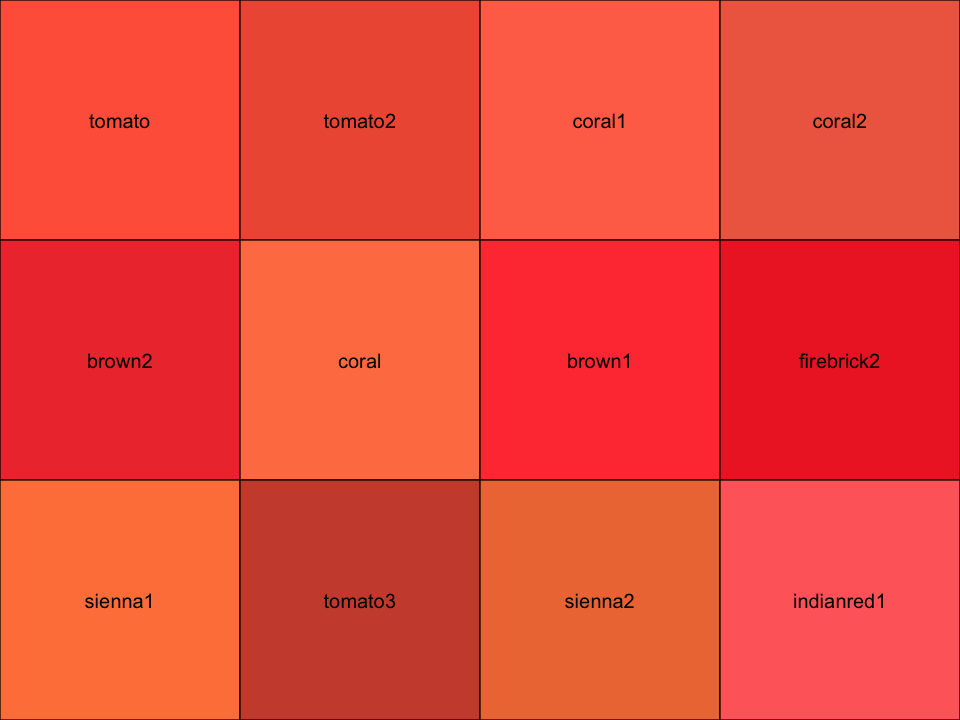

In [25]:
# package "grDevices"
options(repr.plot.width=8, repr.plot.height=6)
demo("colors", echo = FALSE)

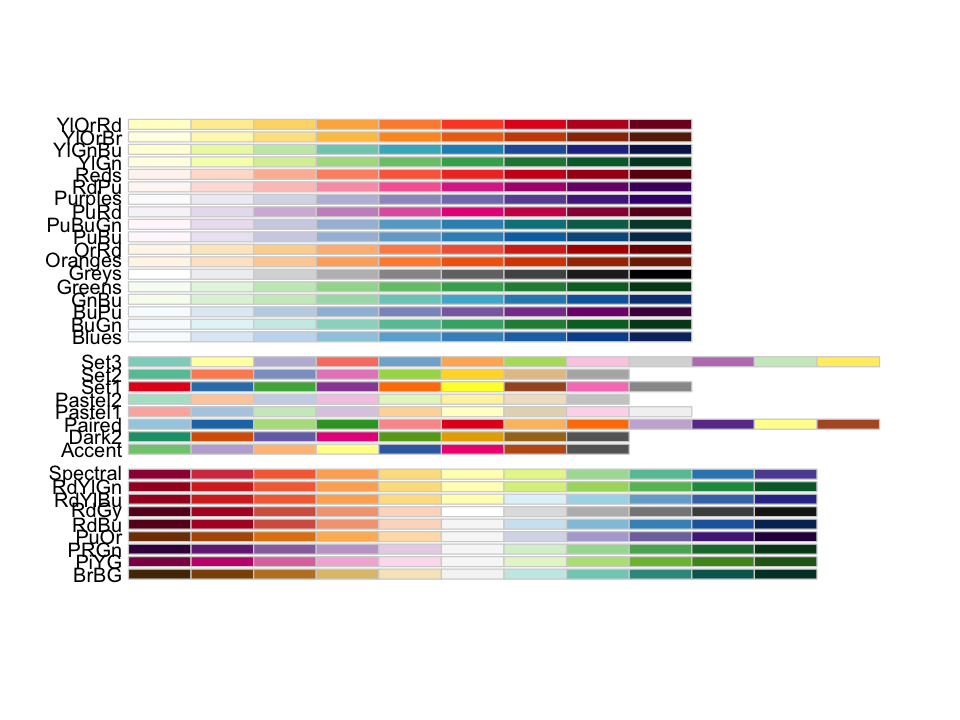

In [26]:
# package "RColorBrewer"
display.brewer.all()

### Ajuste janela e tamanho do gráfico

In [27]:
par()                # ver configurações atuais
opar <- par()        # copiar configuraçãao atual em um objeto

par(mfrow = c(1,2))  # definir dois painéis dentro da janela gráfica (1 linha, 2 colunas)
par(col.lab = "red") # definir cor para legendas dos eixos X e Y
par(mar = c(2,2,4,2) # definir margens do gráfico c(inferior, esq., superior, dir.)
par(pin = c(2,2))    # definir dimensões do gráfico 
    
par(opar)            # utilizar as configurações gravadas anteriormente

ERROR: Error in parse(text = x, srcfile = src): <text>:7:1: unerwartetes Symbol
6: par(mar = c(2,2,4,2) # definir margens do gráfico c(inferior, esq., superior, dir.)
7: par
   ^


### Como dar um toque mais personalizado em gráficos ?
Usar parâmetros ou incluir camadas no gráfico
Veja quais parâmetros são possíveis usando ?plot() ou ??plot()

In [ ]:
# separar painel em duas janelas
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1,2))

# fazer primeiro gráfico (esquerda) como controle
plot(x)

# fazer segundo gráfico (direita) personalizado
plot(carros$wt, 
     
     # rótulos
     main="Forma mais simples\nde representar x",
     sub="legenda",
     xlab="ordem de coleta",
     ylab="valor de x",
     
     # limites
     xlim=c(0,40),
     ylim=c(0,10),
     
     # outros parâmetros
     type="b",
     col="sienna1",
     pch=19,
     las=2
    )

Para mais informações, veja os links abaixo:

+ Parâmetros gráficos em R (por Quick-R) <https://www.statmethods.net/advgraphs/parameters.html>

+ Parâmetros gráficos em R (por STHDA) <http://www.sthda.com/english/wiki/graphical-parameters>

+ 15 Questions All R Users Have About Plots (por R-bloggers) <https://www.r-bloggers.com/15-questions-all-r-users-have-about-plots/>

Ou consulte os fóruns:

https://stats.stackexchange.com/
    
https://www.r-bloggers.com/
    
https://stats.stackexchange.com/

In [ ]:
sessionInfo()